In [14]:
import numpy as np
import torch
import torch.nn as nn
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.dnn import *
from tqdm.notebook import tqdm
%matplotlib notebook
#%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
np.random.seed(42)
#optimizer = GD(lr=0.01)
optimizer = Adam(lr=0.01)

layer1 = Dense(n_inputs=1, n_outputs=10, scale = 1, activation = Sigmoid())
layer2 = Dense(n_inputs=10, n_outputs=1, scale = 1, activation = Identity())
layers =[layer1, layer2]
network = NeuralNetwork(layers, optimizer)

In [16]:
x = np.linspace(0, 1, 10).reshape(-1,1)
y = 0.9*np.exp(-10*(x-0.5)**2)

<IPython.core.display.Javascript object>


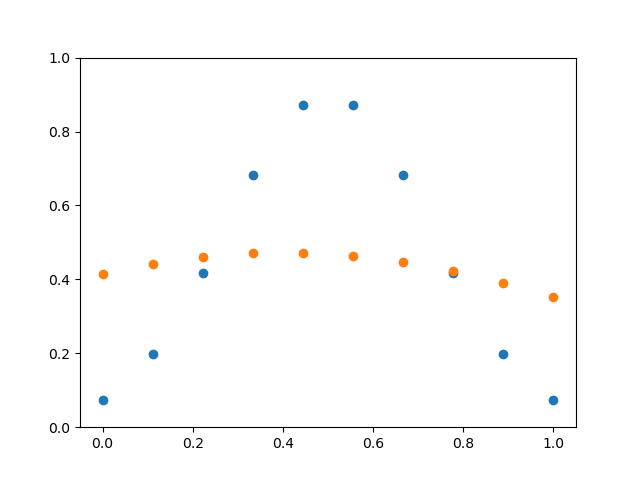

KeyboardInterrupt: 

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in tqdm(range(1000)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1][0])
    
    y_pred = np.array(y_pred)
    loss = np.mean((y_pred - y)**2)
    network.step()
    
    ax.clear()
    ax.plot(x, y, "o")
    ax.plot(x, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

In [ ]:
plt.plot(x, y)
plt.plot(x, y_pred)
plt.show()